In [2]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)      

In [3]:
img_path = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
# 이미지를 4D텐서로 변경
img_tensor = np.expand_dims(img_tensor, axis=0)
# 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


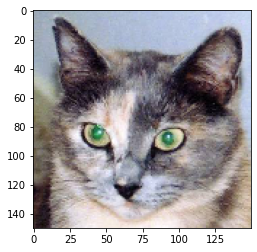

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

# 상위 8개 계층의 출력을 추출
layer_outputs = [layer.output for layer in model.layers[:8]]
# 1 input, 8 output
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

activations = activation_model.predict(img_tensor)

In [9]:
# 148 * 148 사이즈의 32 개의 필터
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


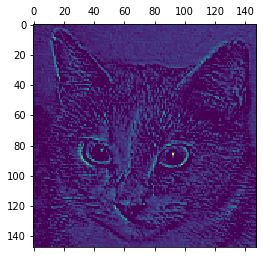

In [11]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

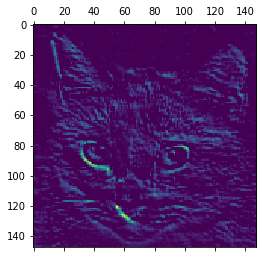

In [13]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


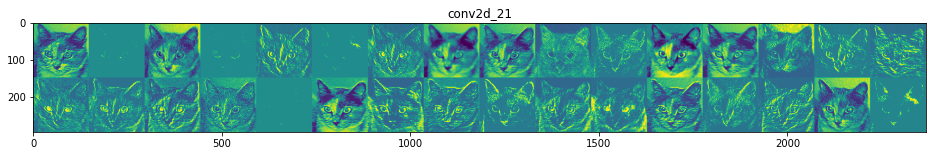

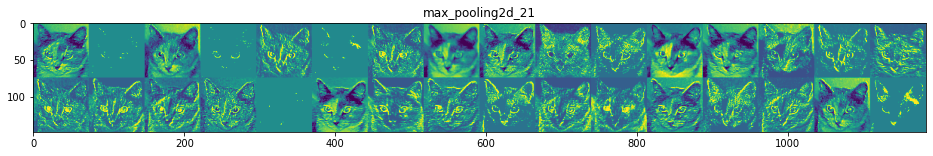

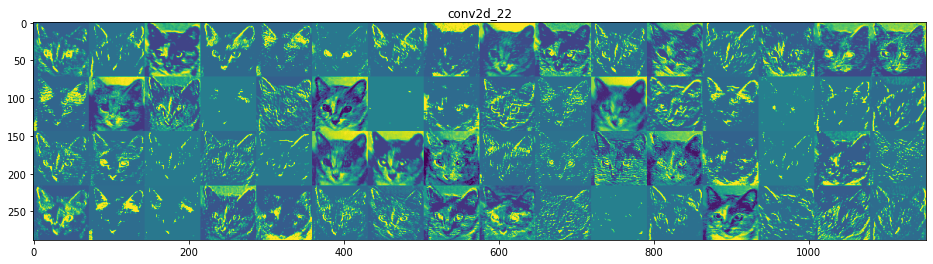

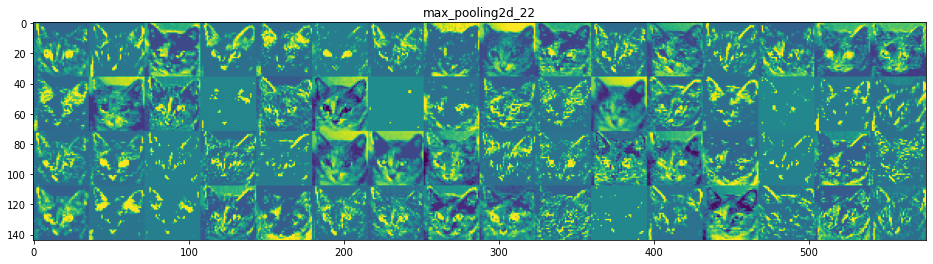

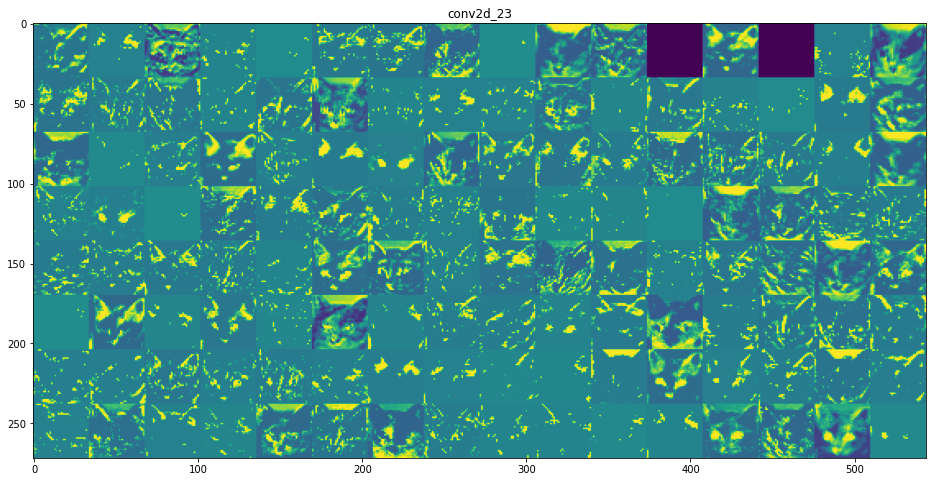

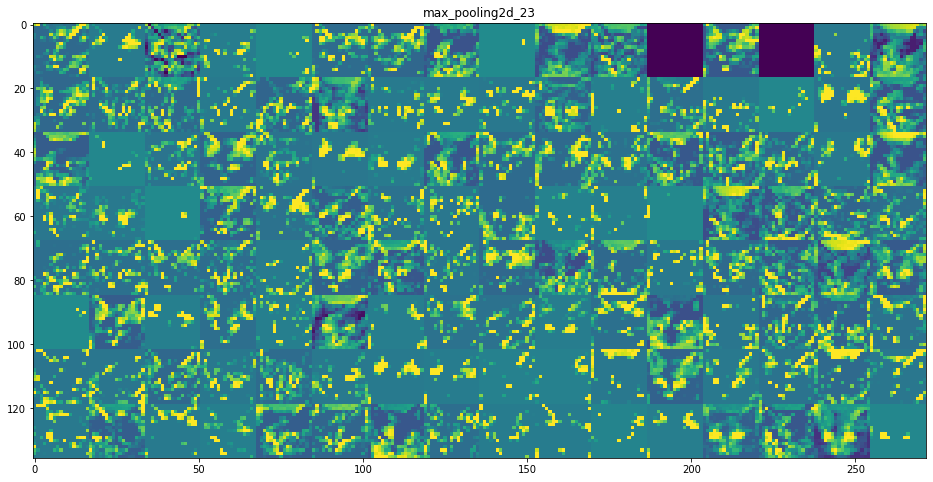

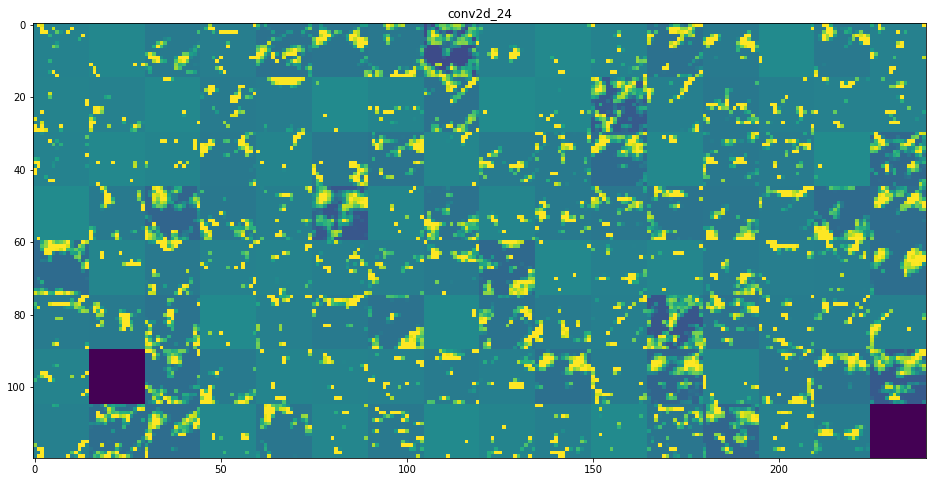

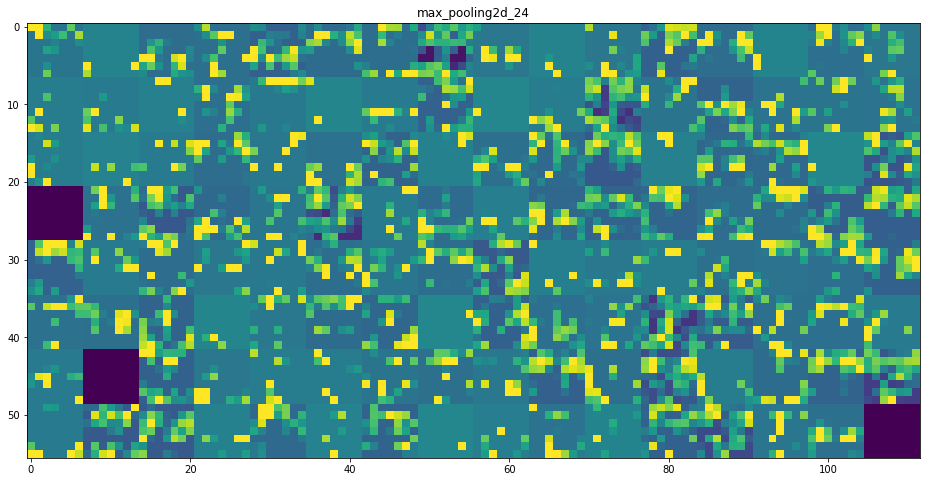

In [19]:
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)

image_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  # 해당 레이어에 있는 특성의 수
  n_features = layer_activation.shape[-1]

  # (1, 148, 148, 32) -> (1, size, size, n_features)
  size = layer_activation.shape[1]

  n_cols = n_features // image_per_row
  display_grid = np.zeros((size * n_cols, image_per_row * size))

  # 각각의 활성화를 하나의 큰 그리드에 그린다
  for col in range(n_cols):
    for row in range(image_per_row):
      channel_image = layer_activation[0, :, :, col * image_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0 ,255).astype('uint8')
      display_grid[col * size : (col+1) * size, row*size : (row+1)*size] = channel_image
  
  scale = 1./size
  plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))

  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()
